In [1]:
import turicreate as tc

### LOADING DATA

In [2]:
image_train = tc.SFrame('image_train_data/')

In [3]:
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


### CREATING NEAREST NEIGHBOUT MODEL

In [4]:
image_test = tc.SFrame('image_test_data/')

In [6]:
image_test.head()

id,image,label,deep_features,image_array
0,Height: 32 Width: 32,cat,"[1.1346900463104248, 0.0,0.0, 0.0, ...","[158.0, 112.0, 49.0,159.0, 111.0, 47.0, ..."
6,Height: 32 Width: 32,automobile,"[0.2313588261604309, 0.0,0.0, 0.0, 0.0, ...","[160.0, 37.0, 13.0,185.0, 49.0, 11.0, 20 ..."
8,Height: 32 Width: 32,cat,"[0.0, 0.0,0.034419238567352295, ...","[23.0, 19.0, 23.0, 19.0,21.0, 28.0, 21.0, 16.0, ..."
9,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 11.6065092086792, ...","[217.0, 215.0, 209.0,210.0, 208.0, 202.0, ..."
12,Height: 32 Width: 32,dog,"[0.3223174810409546, 0.0,1.2493335008621216, 0.0, ...","[91.0, 64.0, 30.0, 82.0,58.0, 30.0, 87.0, 73.0, ..."
16,Height: 32 Width: 32,dog,"[0.0, 0.0,0.34735703468322754, ...","[95.0, 76.0, 78.0, 92.0,77.0, 78.0, 89.0, 77.0, ..."
24,Height: 32 Width: 32,dog,"[1.3155765533447266, 0.0,0.0, 0.0, 0.0, 0.0, ...","[136.0, 134.0, 118.0,142.0, 141.0, 126.0, ..."
25,Height: 32 Width: 32,bird,"[0.0,0.31728875637054443, ...","[100.0, 103.0, 74.0,68.0, 91.0, 65.0, 116.0, ..."
31,Height: 32 Width: 32,dog,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 9.260188102722168, ...","[127.0, 130.0, 81.0,130.0, 133.0, 88.0, ..."
33,Height: 32 Width: 32,dog,"[0.1307867169380188,0.7276672124862671, 0.0, ...","[118.0, 113.0, 81.0,122.0, 117.0, 83.0, ..."


In [7]:
knn_model = tc.nearest_neighbors.create(image_train, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [17]:
img = image_train[17:18]

In [20]:
knn_model.query(img)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 4.253ms      |

| Done         |         | 100         | 156.19ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,367,0.0,1
0,20203,38.55208085473276,2
0,45778,39.18536234732164,3
0,17111,39.95295555537001,4
0,42131,40.12423538404127,5


In [21]:
def get_images_by_ids(query_res):
    return image_train.filter_by(query_res['reference_label'], 'id')

In [22]:
cat_knn = get_images_by_ids(knn_model.query(img))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 16.018ms     |

| Done         |         | 100         | 166.136ms    |

+--------------+---------+-------------+--------------+

In [23]:
cat_knn

id,image,label,deep_features,image_array
367,Height: 32 Width: 32,cat,"[1.3865805864334106, 0.0,0.0, 0.0, 0.0, ...","[168.0, 151.0, 143.0,145.0, 130.0, 124.0, ..."
17111,Height: 32 Width: 32,automobile,"[0.4846263527870178, 0.0,0.0, 0.0, 0.0, 0.0, ...","[18.0, 23.0, 18.0, 22.0,27.0, 22.0, 22.0, 29.0, ..."
20203,Height: 32 Width: 32,cat,"[0.0, 0.0, 0.0, 0.0,0.2603745460510254, 0.0, ...","[46.0, 27.0, 29.0, 45.0,26.0, 28.0, 45.0, 26.0, ..."
42131,Height: 32 Width: 32,cat,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 10.230932235717773, ...","[40.0, 39.0, 21.0, 49.0,44.0, 27.0, 51.0, 43.0, ..."
45778,Height: 32 Width: 32,cat,"[2.006963014602661, 0.0,0.3185436725616455, ...","[25.0, 21.0, 25.0, 29.0,23.0, 24.0, 28.0, 20.0, ..."


,SArray
0,
1,
2,
3,
4,

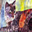
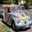
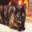
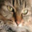
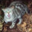

In [25]:
cat_knn['image'].explore()

## ASSIGNMENT

In [26]:
sketch = tc.Sketch(image_train['label'])

In [27]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [28]:
cat_img_train = image_train[image_train['label'] == 'cat']

In [30]:
dog_img_train = image_train[image_train['label'] == 'dog']

In [31]:
automobile_img_train = image_train[image_train['label'] == 'automobile']

In [32]:
bird_img_train = image_train[image_train['label'] == 'bird']

In [33]:
cat_model = tc.nearest_neighbors.create(cat_img_train,label='id', features=['deep_features'] )

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [34]:
dog_model = tc.nearest_neighbors.create(dog_img_train, label='id', features=['deep_features'])

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [35]:
automobile_model = tc.nearest_neighbors.create(automobile_img_train, label='id', features=['deep_features'])

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [36]:
bird_model = tc.nearest_neighbors.create(bird_img_train, label='id', features=['deep_features'])

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [37]:
cat_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 20.815ms     |

| Done         |         | 100         | 87.705ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


In [38]:
knn_cat = get_images_by_ids(cat_model.query(image_test[0:1]))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 13.685ms     |

| Done         |         | 100         | 74.213ms     |

+--------------+---------+-------------+--------------+

,id,image,label,deep_features,image_array
0,331,,cat,"[0.0, 0.0, 0.5109639167785645, 0.0, 0.0, 0.0, 11.272439956665039, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1253304481506348, 0.0, 0.5219167470932007, 0.5971229076385498, 0.0, 0.6972668170928955, 0.0, 0.24001091718673706, 0.0, 1.0731264352798462, 0.0, 0.0, 0.10970926284790039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6569366455078125, 0.0, 0.0, 0.0, 0.0, 1.0214426517486572, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.2922544479370117, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8759312629699707, 0.8046186566352844, 0.0, 1.5726779699325562, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1985647678375244, 0.0, 0.0, 2.738689422607422, 0.0, 0.0, 0.0, 0.48699140548706055, 0.023147881031036377, 0.0, 0.16829437017440796, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8470346331596375, 1.0001214742660522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[45.0, 65.0, 92.0, 72.0, 95.0, 110.0, 106.0, 132.0, 129.0, 106.0, 132.0, 129.0, 109.0, 134.0, 131.0, 111.0, 137.0, 134.0, 111.0, 139.0, 135.0, 115.0, 145.0, 142.0, 91.0, 112.0, 107.0, 85.0, 100.0, 96.0, 92.0, 113.0, 110.0, 84.0, 102.0, 99.0, 116.0, 141.0, 138.0, 122.0, 148.0, 145.0, 122.0, 148.0, 145.0, 123.0, 148.0, 145.0, 122.0, 148.0, 145.0, 122.0, 148.0, 145.0, 122.0, 148.0, 145.0, 122.0, 148.0, 145.0, 122.0, 148.0, 145.0, 123.0, 148.0, 144.0, 123.0, 147.0, 144.0, 123.0, 147.0, 143.0, 122.0, 150.0, 146.0, 108.0, 104.0, 113.0, 93.0, 45.0, 73.0, 72.0, 38.0, 64.0, 41.0, 23.0, 43.0, 23.0, 18.0, 24.0, 36.0, 31.0, 20.0, 52.0, 44.0, 29.0, 46.0, 67.0, 96.0, 76.0, ...]"
1,16289,,cat,"[0.964287519454956, 0.0, 0.0, 0.0, 1.1251550912857056, 0.0, 9.312150955200195, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9964497089385986, 0.20313739776611328, 0.0, 1.9780253171920776, 0.8170939683914185, 0.0, 0.0, 0.0, 0.0, 1.7009224891662598, 0.5013698935508728, 0.0, 0.0, 0.0, 1.9672785997390747, 0.0, 0.0, 0.0, 0.0, 1.1179927587509155, 0.12306243181228638, 0.0, 0.0, 0.013147711753845215, 0.0, 0.0, 1.0392909049987793, 0.9930934309959412, 0.0, 0.0, 0.22333812713623047, 0.009367823600769043, 0.0, 0.0, 0.0, 0.0, 0.13046950101852417, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5344581604003906, 0.0, 0.0, 0.0, 1.211628794670105, 0.0, 0.0, 0.6291561126708984, 0.35370469093322754, 0.5080443620681763, 2.374500274658203, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6534329056739807, 0.0, 0.0, 2.430657386779785, 0.0, 0.0, 0.0, 0.11062061786651611, 0.4345150589942932, 0.0, 0.0, 0.1659744381904602, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.025784790515899658, 0.5490762591362, 0.21386826038360596, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[215.0, 219.0, 231.0, 215.0, 219.0, 232.0, 216.0, 219.0, 233.0, 214.0, 217.0, 230.0, 213.0, 216.0, 230.0, 209.0, 215.0, 226.0, 208.0, 217.0, 221.0, 206.0, 215.0, 219.0, 201.0, 208.0, 217.0, 197.0, 203.0, 218.0, 194.0, 200.0, 221.0, 199.0, 204.0, 221.0, 142.0, 128.0, 131.0, 76.0, 46.0, 46.0, 81.0, 55.0, 57.0, 147.0, 136.0, 139.0, 160.0, 149.0, 154.0, 152.0, 141.0, 144.0, 156.0, 147.0, 150.0, 159.0, 148.0, 154.0, 160.0, 153.0, 157.0, 164.0, 156.0, 160.0, 160.0, 154.0, 158.0, 158.0, 151.0, 156.0, 159.0, 149.0, 157.0, 159.0, 150.0, 156.0, 157.0, 147.0, 154.0, 156.0, 145.0, 153.0, 152.0, 142.0, 149.0, 147.0, 137.0, 143.0, 141.0, 131.0, 136.0, 142.0, 131.0, 136.0, 215.0, 219.0, 231.0, 215.0, ...]"
2,25713,,cat,"[0.5369712710380554, 0.0, 0.0, 0.08944588899612427, 0.2364743947982788, 0.3688161373138428, 9.64945125579834, 0.0, 0.0, 0.0, 0.0, 0.0, 1.345590353012085, 0.7391354441642761, 0.0, 0.0, 0.4072381854057312, 0.8558321595191956, 0.0, 0.0, 0.0, 1.1061797142028809, 0.0, 0.0, 0.0, 0.13240057229995728, 0.1410961151123047, 0.0, 0.0, 0.0, 0.0, 0.7048135995864868, 0.0, 0.0, 0.0, 0.24006950855255127, 0.0, 0.0, 0.6994016766548157, 1.6008036136627197, 0.0, 0.0, 0.0, 0.0, 0.23141270875930786, 0.0, 0.0, 0.0, 0.9568823575973511, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04671293497085571, 0.0, 0.6259481906890869, 0.0, 0.0, 2.228186845779419, 0.0, 0.0, 0.0683944821357727, 0.0, 0.0, 0.8954511880874
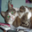
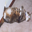
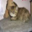
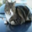
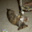

In [41]:
knn_cat.explore()

In [42]:
knn_dog = get_images_by_ids(dog_model.query(image_test[0:1]))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 23.891ms     |

| Done         |         | 100         | 87.01ms      |

+--------------+---------+-------------+--------------+

,id,image,label,deep_features,image_array
0,6094,,dog,"[0.470533549785614, 0.0, 0.0, 0.0, 0.0, 0.0, 9.278953552246094, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22425848245620728, 0.0, 0.6744542717933655, 0.0, 1.6140201091766357, 0.0, 2.0357017517089844, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.427365779876709, 0.568508505821228, 0.0, 0.0, 1.7979466915130615, 1.4885543584823608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.44374212622642517, 0.0, 0.0, 0.0, 0.0, 0.0, 1.018580436706543, 0.0, 0.0, 0.0, 0.0, 0.0, 2.99509596824646, 0.0, 0.0, 0.4832870364189148, 0.0, 0.3561042547225952, 0.0, 2.4157166481018066, 1.0644227266311646, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.040470600128174, 0.8788043856620789, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[91.0, 98.0, 71.0, 138.0, 123.0, 63.0, 135.0, 115.0, 50.0, 116.0, 99.0, 54.0, 118.0, 101.0, 54.0, 114.0, 99.0, 56.0, 101.0, 86.0, 55.0, 100.0, 88.0, 62.0, 95.0, 86.0, 58.0, 93.0, 84.0, 56.0, 93.0, 84.0, 56.0, 102.0, 91.0, 67.0, 114.0, 99.0, 80.0, 121.0, 101.0, 71.0, 124.0, 96.0, 59.0, 122.0, 88.0, 49.0, 123.0, 88.0, 47.0, 124.0, 94.0, 56.0, 117.0, 91.0, 55.0, 125.0, 95.0, 57.0, 122.0, 90.0, 49.0, 114.0, 86.0, 49.0, 110.0, 86.0, 51.0, 109.0, 79.0, 42.0, 100.0, 70.0, 27.0, 99.0, 74.0, 29.0, 104.0, 73.0, 29.0, 117.0, 79.0, 29.0, 138.0, 96.0, 37.0, 139.0, 94.0, 41.0, 131.0, 92.0, 43.0, 105.0, 74.0, 29.0, 96.0, 102.0, 70.0, 126.0, ...]"
1,13387,,dog,"[0.36649417877197266, 0.0, 0.0, 0.0, 0.0, 0.0, 8.915741920471191, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5137600898742676, 0.0, 0.0, 0.673179030418396, 0.0, 0.0, 0.0, 0.0, 0.0, 1.791056752204895, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25842756032943726, 0.0, 0.0, 0.0, 0.24773627519607544, 0.06141239404678345, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0704283714294434, 1.1447938680648804, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13471126556396484, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9594002962112427, 0.703919529914856, 0.31422656774520874, 2.0758111476898193, 0.0, 0.0, 0.0, 0.0, 0.0, 1.373142957687378, 0.0, 0.0, 2.209083080291748, 0.0, 0.0, 0.0, 0.7403751611709595, 0.2639371156692505, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3191516399383545, 0.9088151454925537, 0.21029609441757202, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 253.0, 254.0, 254.0, 253.0, 253.0, 253.0, 250.0, 249.0, 249.0, 249.0, 248.0, 248.0, 248.0, 248.0, 247.0, 248.0, 245.0, 240.0, 247.0, 239.0, 229.0, 243.0, 226.0, 205.0, 227.0, 204.0, 176.0, 219.0, 201.0, 178.0, 219.0, 202.0, 183.0, 216.0, 196.0, 180.0, 207.0, 186.0, 176.0, 195.0, 182.0, 173.0, 183.0, 170.0, 161.0, 179.0, 166.0, 154.0, 175.0, 161.0, 147.0, 176.0, 160.0, 149.0, 183.0, 162.0, 155.0, 155.0, 140.0, 133.0, 255.0, 255.0, 255.0, 242.0, ...]"
2,16976,,dog,"[0.7555953860282898, 0.0, 0.0, 0.0, 0.0, 0.0, 9.460389137268066, 0.12622767686843872, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09528166055679321, 0.0, 0.4171280264854431, 0.0, 0.0, 0.0, 0.08742207288742065, 0.0, 0.0, 0.0, 0.0, 0.5559314489364624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.4493837356567383, 0.24993890523910522, 0.0, 0.0, 0.5614703893661499, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6808208227157593, 0.0, 0.0, 0.0, 0.127973735332489, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1695382595062256, 0.0, 0.0, 0.9742746353149414, 0.0, 0.0, 0.0, 0.8248510956764221, 2.490147113800049, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.3068113327026367, 0.5234540700912476, 0.16325676441192627, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[16.0, 17.0, 11.0, 18.0, 19.0, 13.0, 20.0, 21.0, 15.0, 24.0, 25.0, 19.0, 26.0, 27.0, 21.0, 22.0, 23.0, 17.0, 19.0, 20.0, 14.0, 19.0, 20.0, 15.0, 16.0
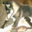
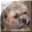
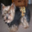
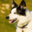
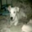

In [43]:
knn_dog.explore()

In [45]:
f_cat_mean = cat_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 8.139ms      |

| Done         |         | 100         | 54.67ms      |

+--------------+---------+-------------+--------------+

In [47]:
f_cat_mean['distance'].mean()

36.15573070978294

In [48]:
d_dog_mean = dog_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 12.017ms     |

| Done         |         | 100         | 56.594ms     |

+--------------+---------+-------------+--------------+

In [49]:
d_dog_mean['distance'].mean()

37.77071136184156

In [50]:
test_cat_img = cat_img_train

In [51]:
test_dog_img = dog_img_train

In [52]:
test_bird_img = bird_img_train

In [53]:
test_auto_img = automobile_img_train

In [54]:
dog_cat_neighbors = cat_model.query(test_dog_img, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 509          | 64643   | 24.9509     | 202.757ms    |

| Done         | 259081  | 100         | 231.621ms    |

+--------------+---------+-------------+--------------+

In [55]:
dog_bird_neighbors = bird_model.query(test_dog_img, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 509          | 60571   | 24.8954     | 194.101ms    |

| Done         | 243302  | 100         | 219.235ms    |

+--------------+---------+-------------+--------------+

In [57]:
dog_auto_neighbors = automobile_model.query(test_dog_img, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 509          | 64643   | 24.9509     | 190.196ms    |

| Done         | 259081  | 100         | 223.619ms    |

+--------------+---------+-------------+--------------+

In [58]:
dog_dog_model = dog_model.query(test_dog_img, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 509          | 64643   | 24.9509     | 196.604ms    |

| Done         | 259081  | 100         | 210.162ms    |

+--------------+---------+-------------+--------------+

In [59]:
dog_dog_model

query_label,reference_label,distance,rank
0,70,0.0,1
1,107,0.0,1
2,177,0.0,1
3,424,2.86102294921875e-06,1
4,462,2.6973983046972182e-06,1
5,542,0.0,1
6,573,0.0,1
7,851,0.0,1
8,919,0.0,1
9,1172,0.0,1


In [64]:
dog_distances = tc.SFrame({'dog-dog': dog_dog_model['distance'], 'dog-cat': dog_cat_neighbors['distance'],
                         'dog_auto': dog_auto_neighbors['distance'], 'dog_bird': dog_bird_neighbors['distance'] })

In [65]:
dog_distances

dog-cat,dog-dog,dog_auto,dog_bird
40.46011258793053,0.0,41.30510678935087,41.6822518309282
32.298556721410975,0.0,40.50381018230467,37.69666778567965
40.200974884533515,0.0,44.68227501998545,39.85733907436836
35.53890673066188,2.86102294921875e-06,37.885130232310715,38.1435927319933
36.1824433193014,2.6973983046972182e-06,39.25481255134784,37.10999173381814
35.94616836521785,0.0,39.993610715172856,37.966827579958306
38.79583222994949,0.0,44.52311599359084,42.087379028405486
40.295786898221415,0.0,40.19845545011892,41.380512651336204
42.78329024648902,0.0,50.26122957030132,43.58133888012344
35.19691392833802,0.0,47.59405252443334,39.81169927626512


In [66]:
len(dog_distances)

509

In [84]:
def is_dog_correct(row):
#     print(row, type(row))
    temp = min(row.values()) 
    res = [key for key in row if row[key] == temp] 
    print(res, type(res))
    if res[0] == 'dog-dog':
        return 1
    return 0

In [85]:
dog_distances.apply(is_dog_correct).sum()

['dog-dog'] <class 'list'>
['dog-dog'] <class 'list'>
['dog-dog'] <class 'list'>
['dog-dog'] <class 'list'>
['dog-dog'] <class 'list'>
['dog-dog'] <class 'list'>
['dog-dog'] <class 'list'>
['dog-dog'] <class 'list'>
['dog-dog'] <class 'list'>
['dog-dog'] <class 'list'>


509